<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Explorando-os-dados-de-bicicletas-compartilhadas-em-Chicago" data-toc-modified-id="Explorando-os-dados-de-bicicletas-compartilhadas-em-Chicago-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Explorando os dados de bicicletas compartilhadas em Chicago</a></span></li></ul></div>

# Projeto I - Fundamentos de Data Scientist I - Udacity

### Explorando os dados de bicicletas compartilhadas em Chicago

In [1]:
# Colunas (campos) presentes neste dataset:
    # Start Time
    # End Time
    # Trip Duration
    # Start Station
    # End Station
    # User Type
    # Gender
    # Birth Year

In [15]:
# Imports iniciais
import csv
import matplotlib.pyplot as plt
import statistics

In [3]:
# Tratanto lista com csv.reader
with open('chicago-bikeshare-pt/chicago.csv', 'r') as file_read:
    reader = csv.reader(file_read)
    data_list = list(reader)

In [4]:
# Tratando lista (dict) com csv.DictReader
with open('chicago-bikeshare-pt/chicago.csv', 'r') as file_read:
    named_list = [{k: v for k, v in row.items()} for row in csv.DictReader(file_read, skipinitialspace=True)]

In [5]:
# Testando ambos
print('Testando data_list')
print(data_list[0])
print('\nAcessando Gênero da segunda amostra através de data_list')
print(data_list[2][6])

print('\n- - -')

print('\nTestando named_list')
print(named_list[0])
print('\nAcessando Gênero da segunda amostra através de named_list')
print(named_list[1]['Gender'])


Testando data_list
['Start Time', 'End Time', 'Trip Duration', 'Start Station', 'End Station', 'User Type', 'Gender', 'Birth Year']

Acessando Gênero da segunda amostra através de data_list
Male

- - -

Testando named_list
{'Start Time': '2017-01-01 00:00:36', 'End Time': '2017-01-01 00:06:32', 'Trip Duration': '356', 'Start Station': 'Canal St & Taylor St', 'End Station': 'Canal St & Monroe St (*)', 'User Type': 'Customer', 'Gender': '', 'Birth Year': ''}

Acessando Gênero da segunda amostra através de named_list
Male


In [6]:
## Tarefa 1: Imprimindo as 20 primeiras amostras

# 1) Via data_list
for i in range(1, 21):
    print(data_list[i])

['2017-01-01 00:00:36', '2017-01-01 00:06:32', '356', 'Canal St & Taylor St', 'Canal St & Monroe St (*)', 'Customer', '', '']
['2017-01-01 00:02:54', '2017-01-01 00:08:21', '327', 'Larrabee St & Menomonee St', 'Sheffield Ave & Kingsbury St', 'Subscriber', 'Male', '1984.0']
['2017-01-01 00:06:06', '2017-01-01 00:18:31', '745', 'Orleans St & Chestnut St (NEXT Apts)', 'Ashland Ave & Blackhawk St', 'Subscriber', 'Male', '1985.0']
['2017-01-01 00:07:28', '2017-01-01 00:12:51', '323', 'Franklin St & Monroe St', 'Clinton St & Tilden St', 'Subscriber', 'Male', '1990.0']
['2017-01-01 00:07:57', '2017-01-01 00:20:53', '776', 'Broadway & Barry Ave', 'Sedgwick St & North Ave', 'Subscriber', 'Male', '1990.0']
['2017-01-01 00:10:44', '2017-01-01 00:21:27', '643', 'State St & Kinzie St', 'Wells St & Polk St', 'Subscriber', 'Male', '1970.0']
['2017-01-01 00:11:34', '2017-01-01 00:23:47', '733', 'Wabash Ave & Wacker Pl', 'Clinton St & Tilden St', 'Subscriber', 'Male', '1986.0']
['2017-01-01 00:14:57', 

In [16]:
## Tarefa 1: Imprimindo as 20 primeiras amostras

# 2) Via named_list (dict)
for i in range(20):
    print(f'{"AMOSTRA "}{i+1}: {named_list[i]}')
    print()

AMOSTRA 1: {'Start Time': '2017-01-01 00:00:36', 'End Time': '2017-01-01 00:06:32', 'Trip Duration': '356', 'Start Station': 'Canal St & Taylor St', 'End Station': 'Canal St & Monroe St (*)', 'User Type': 'Customer', 'Gender': '', 'Birth Year': ''}

AMOSTRA 2: {'Start Time': '2017-01-01 00:02:54', 'End Time': '2017-01-01 00:08:21', 'Trip Duration': '327', 'Start Station': 'Larrabee St & Menomonee St', 'End Station': 'Sheffield Ave & Kingsbury St', 'User Type': 'Subscriber', 'Gender': 'Male', 'Birth Year': '1984.0'}

AMOSTRA 3: {'Start Time': '2017-01-01 00:06:06', 'End Time': '2017-01-01 00:18:31', 'Trip Duration': '745', 'Start Station': 'Orleans St & Chestnut St (NEXT Apts)', 'End Station': 'Ashland Ave & Blackhawk St', 'User Type': 'Subscriber', 'Gender': 'Male', 'Birth Year': '1985.0'}

AMOSTRA 4: {'Start Time': '2017-01-01 00:07:28', 'End Time': '2017-01-01 00:12:51', 'Trip Duration': '323', 'Start Station': 'Franklin St & Monroe St', 'End Station': 'Clinton St & Tilden St', 'User

In [7]:
# Tarefa 2: imprimindo o gênero das 20 primeiras amostras

# 1) Via data_list
data_list = data_list[1:] # Excluindo o cabeçalho da lista
for i in range(20):
    print(f'{"Amostra "}{i+1}: {data_list[i][6] if data_list[i][6] != "" else "Não informado"}')



Amostra 1: Não informado
Amostra 2: Male
Amostra 3: Male
Amostra 4: Male
Amostra 5: Male
Amostra 6: Male
Amostra 7: Male
Amostra 8: Não informado
Amostra 9: Não informado
Amostra 10: Não informado
Amostra 11: Female
Amostra 12: Não informado
Amostra 13: Male
Amostra 14: Male
Amostra 15: Female
Amostra 16: Male
Amostra 17: Male
Amostra 18: Male
Amostra 19: Female
Amostra 20: Male


In [9]:
# Tarefa 2: imprimindo o gênero das 20 primeiras amostras

# 2) Via named_list (dict)
for i in range(20):
    print(f'{"Amostra "}{i+1:2}: {named_list[i]["Gender"] if named_list[i]["Gender"] != "" else "Não informado"}')

Amostra  1: Não informado
Amostra  2: Male
Amostra  3: Male
Amostra  4: Male
Amostra  5: Male
Amostra  6: Male
Amostra  7: Male
Amostra  8: Não informado
Amostra  9: Não informado
Amostra 10: Não informado
Amostra 11: Female
Amostra 12: Não informado
Amostra 13: Male
Amostra 14: Male
Amostra 15: Female
Amostra 16: Male
Amostra 17: Male
Amostra 18: Male
Amostra 19: Female
Amostra 20: Male


In [33]:
# Tarefa 3: Crie uma função para adicionar as colunas(features) de uma lista em outra lista, na mesma ordem

def column_to_list(data, index):
    """
    Cria uma lista com todos os dados referentes a uma determinada coluna
    
    Argumentos:
    data -- Dataset no qual deseja-se extrair os campos (list)
    index -- Referência numérica do índice da coluna dentro do referido Dataset (int)
    
    Retorno:
    column_list -- Lista com todos os dados referentes ao campo em questão (list)
    """
    column_list = []
    for registro in data:
        try:
            column_list.append(registro[index])
        except IndexError:
            message = 'Para o data_set "data", selecione um "index" < {}.'.format(len(data[0]))
            return message
    return column_list

coluna_ano_nascimento = column_to_list(data_list, 7)
print(len(column_to_list(data_list, -2)))
print(column_to_list(data_list, -2)[:20])

1551505
['', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', '', '', '', 'Female', '', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male']


In [11]:
# Tarefa 3: Crie uma função para adicionar as colunas(features) de uma lista em outra lista, na mesma ordem

def column_to_list(data, index):
    """
    Cria uma lista com todos os dados referentes a uma determinada coluna
    
    Argumentos:
    data -- Dataset no qual deseja-se extrair os campos (lista de dicionários)
    index -- Nome da coluna [chave] dentro do referido Dataset (string)
    
    Retorno:
    column_list -- Lista com todos os dados referentes ao campo em questão (list)
    """
    column_list = []
    #index = index.title() # Evita erros do tipo "birth year" != "Birth Year"
    for registro in data:
        try:
            column_list.append(registro[index])
        except KeyError:
            print('Coluna inexistente no Dataset "data". Veja as entradas possíveis: ')
            chaves = list(registro.keys())
            return chaves
    return column_list

result = column_to_list(named_list, 'teste')
print(result[:50])        

Coluna inexistente no Dataset "data". Veja as entradas possíveis: 
['Start Time', 'End Time', 'Trip Duration', 'Start Station', 'End Station', 'User Type', 'Gender', 'Birth Year']


In [12]:
# TAREFA 4
# Agora sabemos como acessar as features, vamos contar quantos Male (Masculinos) e Female (Femininos) o dataset tem
# TODO: Conte cada gênero. Você não deveria usar uma função parTODO isso.
masculino = feminino = 0

gender_column_data = column_to_list(data_list, 6)

for gender in gender_column_data:
    if gender == 'Male':
        masculino += 1
    elif gender == 'Female':
        feminino += 1

print(f'Masculinos: {masculino}\nFeminino: {feminino}')

Masculinos: 935854
Feminino: 298784


In [13]:
# TAREFA 5
# TODO: Crie uma função para contar os gêneros. Retorne uma lista.
# Isso deveria retornar uma lista com [count_male, count_female] (exemplo: [10, 15] significa 10 Masculinos, 15 Femininos)
def count_gender(data_list):
    male = 0
    female = 0
    
    gender_column_data = column_to_list(data_list, 6)
    
    for gender in gender_column_data:
        if gender == 'Male':
            male += 1
        elif gender == 'Female':
            female += 1
    return [male, female]

gender_list = count_gender(data_list)
print(type(gender_list))
print(f'Tamanho da lista retornada: {len(gender_list)}')
print(f'Masculinos: {gender_list[0]}')
print(f'Femininos: {gender_list[1]}')

<class 'list'>
Tamanho da lista retornada: 2
Masculinos: 935854
Femininos: 298784


In [14]:
# Agora que nós podemos contar os usuários, qual gênero é mais prevalente?
# TAREFA 6
# TODO: Crie uma função que pegue o gênero mais popular, e retorne este gênero como uma string.
# Esperamos ver "Masculino", "Feminino", ou "Igual" como resposta.
def most_popular_gender(data_list):
    male = 0
    female = 0   
    gender_column_data = column_to_list(data_list, 6)    
    
    for gender in gender_column_data:
        if gender == 'Male':
            male += 1
        elif gender == 'Female':
            female += 1
    
    if male > female:
        answer = 'Male'
    elif female > male:
        answer = 'Female'
    else:
        answer = 'Igual'
    
    return answer

print(most_popular_gender(data_list))

Male


In [ ]:
"""
# Se tudo está rodando como esperado, verifique este gráfico!
gender_list = column_to_list(data_list, -2)
types = ["Male", "Female"]
quantity = count_gender(data_list)
y_pos = list(range(len(types)))
plt.bar(y_pos, quantity)
plt.ylabel('Quantidade')
plt.xlabel('Gênero')
plt.xticks(y_pos, types)
plt.title('Quantidade por Gênero')
plt.show(block=True)

input("Aperte Enter para continuar...")
"""

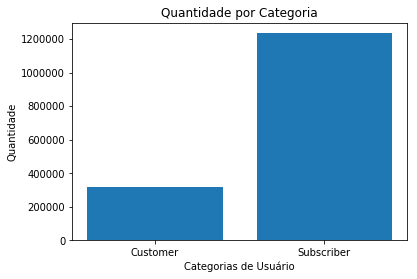

In [39]:
# TAREFA 7
# TODO: Crie um gráfico similar para user_types. Tenha certeza que a legenda está correta.

def count_user_types(data_list):
    costumer = subscriber = 0
    
    user_types_data = column_to_list(data_list, 5)
    
    for user_type in user_types_data:
        if user_type == 'Customer':
            costumer += 1
        elif user_type == 'Subscriber':
            subscriber += 1
    return [costumer, subscriber]

user_types_list = column_to_list(data_list, 5)
#print(user_types_list[:40])
types = ['Customer', 'Subscriber']
quantity = count_user_types(data_list)
#print(f'Customers: {quantity[0]} \nSubscribers: {quantity[1]}')
y_pos = list(range(len(types)))
plt.bar(y_pos, quantity)
plt.ylabel('Quantidade')
plt.xlabel('Categorias de Usuário')
plt.xticks(y_pos, types)
plt.title('Quantidade por Categoria')
plt.show(block=True)

In [16]:
# TAREFA 8
# TODO: Responda a seguinte questão
male, female = count_gender(data_list)
print("\nTAREFA 8: Por que a condição a seguir é Falsa?")
print("male + female == len(data_list):", male + female == len(data_list))
answer = "A condição acima é falsa pois, na base de dados fornecida, há também entradas cujo gênero não foi especificado, ou seja, além de gêneros masculinos\
 e femininos, há valores vazios que devem ser contabilizados, dentro da lista de gêneros, por 'lista_generos.count('')'"
print("resposta:", answer)


TAREFA 8: Por que a condição a seguir é Falsa?
male + female == len(data_list): False
resposta: A condição acima é falsa pois, na base de dados fornecida, há também entradas cujo gênero não foi especificado, ou seja, além de gêneros masculinos e femininos, há valores vazios que devem ser contabilizados, dentro da lista de gêneros, por 'lista_generos.count('')'


In [21]:
# Vamos trabalhar com trip_duration (duração da viagem) agora. Não conseguimos tirar alguns valores dele.
# TAREFA 9
# TODO: Ache a duração de viagem Mínima, Máxima, Média, e Mediana.
# Você não deve usar funções prontas parTODO isso, como max() e min().
trip_duration_list = column_to_list(data_list, 2)
min_trip = 0.
max_trip = 0.
mean_trip = 0.
median_trip = 0.

print(trip_duration_list[:50])
print()
min_trip = min(int(i) for i in trip_duration_list)
max_trip = max(int(i) for i in trip_duration_list)
mean_trip = (sum(int(i) for i in trip_duration_list)) / len(trip_duration_list)
median_trip = statistics.median(int(i) for i in trip_duration_list)

"""mediana = trip_duration_list[int((len(trip_duration_list)/2))+1]
print(len(trip_duration_list))
print(trip_duration_list.index('670'))"""


print(f'Duração mínima de viagem: {min_trip}s')
print(f'Duração máxima de viagem: {max_trip}s')
print(f'Duração média de viagem: {mean_trip}s')
print(f'Mediana: {median_trip}s')
#print(f'Mediana na raça: {mediana}s')

['356', '327', '745', '323', '776', '643', '733', '685', '685', '768', '38781', '757', '177', '332', '846', '1056', '799', '938', '916', '208', '354', '265', '2424', '541', '450', '393', '1799', '748', '755', '1792', '701', '1683', '782', '657', '539', '386', '378', '663', '896', '1246', '88', '552', '1396', '619', '370', '882', '725', '404', '333', '288']

Duração mínima de viagem: 60s
Duração máxima de viagem: 86338s
Duração média de viagem: 939.7777590146342s
Mediana: 670s


In [22]:
# TAREFA 10
# Gênero é fácil porque nós temos apenas algumas opções. E quanto a start_stations? Quantas opções ele tem?
# TODO: Verifique quantos tipos de start_stations nós temos, usando set()

user_types = set(column_to_list(data_list, 3)) # A função column_to_list retorna uma lista com TODAS as Start Stations (arg = 3)

print("\nTAREFA 10: Imprimindo as start stations:")
print(len(user_types))
print(user_types)


TAREFA 10: Imprimindo as start stations:
582
{'MLK Jr Dr & 29th St', 'Clinton St & Lake St', 'State St & Harrison St', 'Clark St & Congress Pkwy', 'Franklin St & Jackson Blvd', 'Oak Park Ave & Harrison St', 'Southport Ave & Irving Park Rd', 'MLK Jr Dr & Oakwood Blvd', 'Valli Produce - Evanston Plaza', 'Halsted St & 47th Pl', 'Pulaski Rd & Congress Pkwy', 'Western Ave & 28th St', 'Leavitt St & Archer Ave', 'Western Ave & Winnebago Ave', 'Indiana Ave & Roosevelt Rd', 'Lake Park Ave & 47th St', 'Clinton St & Roosevelt Rd', 'Kilbourn Ave & Irving Park Rd', 'Leavitt St & Lawrence Ave', 'Seeley Ave & Garfield Blvd', 'Ogden Ave & Chicago Ave', 'Clark St & Berwyn Ave', 'Broadway & Ridge Ave', 'Stony Island Ave & 64th St', 'Central Park Blvd & 5th Ave', 'Ellis Ave & 53rd St', 'California Ave & Fletcher St', 'Keystone Ave & Montrose Ave', 'Ashland Ave & Wrightwood Ave', 'East Ave & Madison St', 'Green St & Randolph St', 'Rockwell St & Eastwood Ave', 'Albany Ave & 26th St', 'Clark St & Touhy Ave

In [35]:
# TAREFA 12 - Desafio! (Opcional)
# TODO: Crie uma função para contar tipos de usuários, sem definir os tipos
# para que nós possamos usar essa função com outra categoria de dados.

def count_items(column_list):
    item_types = []
    count_items = [] 
    for item in column_list:
        if item not in item_types:
            item_types.append(item)
    
    for item in item_types:
        count_items.append(column_list.count(item))
    return item_types, count_items

column_list = column_to_list(data_list, -2) # Mesma coisa que column_to_list(data_list, 6) = Genero
types, counts = count_items(column_list)
print("\nTAREFA 11: Imprimindo resultados para count_items()")
print("Tipos:", types, "Counts:", counts)
print(len(types))
print(sum(counts))


TAREFA 11: Imprimindo resultados para count_items()
Tipos: ['', 'Male', 'Female'] Counts: [316867, 935854, 298784]
3
1551505
